In [62]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime
from datetime import date
import statsmodels.api as sm

In [63]:
# Import and prepare data
df = yf.download('XRP-USD',
                      start='2021-01-01',
                      end='2022-04-08',
                      progress=False,
)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,0.842923,0.842952,0.810890,0.827251,0.827251,1876069127
2022-04-05,0.827227,0.833287,0.817110,0.817642,0.817642,1548706718
2022-04-06,0.817627,0.818405,0.761285,0.761314,0.761314,2527126540
2022-04-07,0.761361,0.789484,0.758114,0.788000,0.788000,1628783831
2022-04-08,0.787997,0.792985,0.750893,0.754056,0.754056,1684019539


<AxesSubplot:xlabel='Date'>

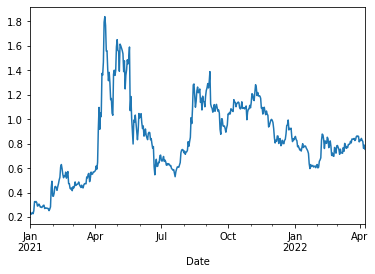

In [58]:
df.Close.plot()

In [59]:
# Calculate the 30-day Moving average
df.Close.rolling(window=30).mean()

Date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-04-04    0.805606
2022-04-05    0.808661
2022-04-06    0.809928
2022-04-07    0.812163
2022-04-08    0.811723
Name: Close, Length: 463, dtype: float64

<AxesSubplot:xlabel='Date'>

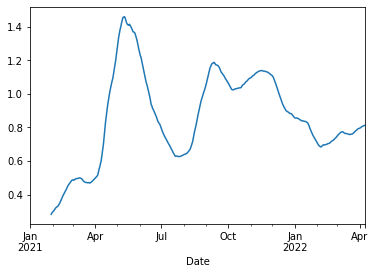

In [60]:
df.Close.rolling(window=30).mean().plot()

In [40]:
# Calculate the Exponentially - Weighted Moving Average (30)
df.Close.ewm(halflife=30).mean()

Date
2021-01-01    0.237444
2021-01-02    0.229458
2021-01-03    0.228227
2021-01-04    0.230413
2021-01-05    0.229646
                ...   
2022-04-04    0.802289
2022-04-05    0.802640
2022-04-06    0.801696
2022-04-07    0.801383
2022-04-08    0.800302
Name: Close, Length: 463, dtype: float64

<AxesSubplot:xlabel='Date'>

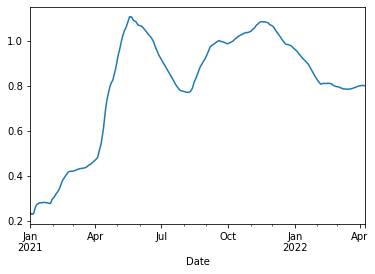

In [41]:
df.Close.ewm(halflife=30).mean().plot()

In [42]:
# Calculate the 200-day Moving average
df.Close.rolling(window=200).mean()

Date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-04-04    0.895142
2022-04-05    0.893902
2022-04-06    0.892331
2022-04-07    0.891028
2022-04-08    0.890213
Name: Close, Length: 463, dtype: float64

<AxesSubplot:xlabel='Date'>

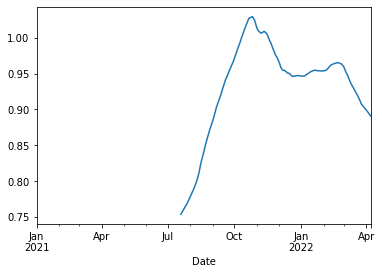

In [50]:
df.Close.rolling(window=200).mean().plot()

In [51]:
# Calculate the Exponentially-Weighted Moving Average (200)
df.Close.ewm(halflife=200).mean()

Date
2021-01-01    0.237444
2021-01-02    0.229536
2021-01-03    0.228302
2021-01-04    0.230407
2021-01-05    0.229670
                ...   
2022-04-04    0.865981
2022-04-05    0.865771
2022-04-06    0.865318
2022-04-07    0.864983
2022-04-08    0.864503
Name: Close, Length: 463, dtype: float64

<AxesSubplot:xlabel='Date'>

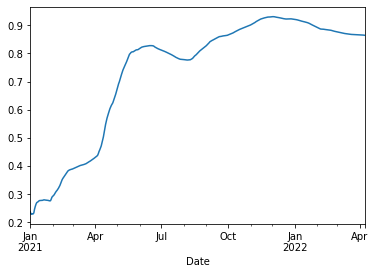

In [52]:
df.Close.ewm(halflife=200).mean().plot()

In [53]:
#Hodrick-Prescott filter
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df['Close'])

<AxesSubplot:xlabel='Date'>

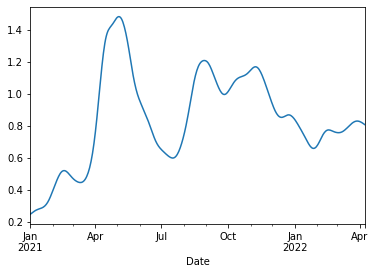

In [54]:
ts_trend.plot()

<AxesSubplot:xlabel='Date'>

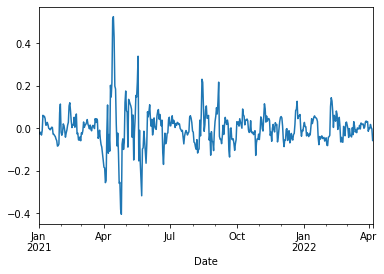

In [14]:
ts_noise.plot()